In [16]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Introduction to Pandas

## From the Pandas documentation:

Here are just a few of the things that pandas does well:

- Easy handling of **missing data** (represented as NaN) in floating point as well as non-floating point data
- Size mutability: columns can be **inserted and deleted** from DataFrame and higher dimensional objects
- Automatic and explicit **data alignment**: objects can be explicitly aligned to a set of labels, or the user can simply ignore the labels and let Series, DataFrame, etc. automatically align the data for you in computations
- Powerful, flexible **group by** functionality to perform split-apply-combine operations on data sets, for both aggregating and transforming data
- Make it **easy to convert** ragged, differently-indexed data in other Python and NumPy data structures into DataFrame objects
- Intelligent **label-based slicing**, **fancy indexing**, and **subsetting** of large data sets
- Intuitive **merging** and **joining** data sets
- Flexible **reshaping** and **pivoting** of data sets
- **Hierarchical labeling** of axes (possible to have multiple labels per tick)
- **Robust IO tools** for loading data from flat files (CSV and delimited), Excel files, databases, and saving / loading data from the ultrafast HDF5 format
- **Time series**-specific functionality: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging, etc.

### 10 Minutes Intro to Pandas ###
http://pandas.pydata.org/pandas-docs/stable/10min.html

## Set up Pandas default params

In [17]:
# imports a library 'pandas', names it as 'pd'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline

In [18]:
print("Pandas version:",pd.__version__)
print("Numpy version:",np.__version__)

Pandas version: 0.18.1
Numpy version: 1.10.4


In [11]:
# various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

## Data structures

### 1. Series

One Dimensional Array / Vector of Values (Think these as your data columns).  One important aspect of them is that they carry an "index" (which you can think of as a row indicator).

### 2. Dataframes

Think of DataFrame as a Table with Columns.  This is the workhorse of everything you will do with data analysis.  Learning Pandas and its functions can be challenging, but stick with it and ask questions.  Structurally, a DataFrame can be thought of as a collection of Series objects with the same index.

### 3. [Panel Data](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Panel.html)

Three Dimensional Arrays  (Mentioned for reference, but we will not get much into these)

In [12]:
# So, what is a Pandas Dataframe

In [13]:
pd.Series? # to get docs

SyntaxError: invalid syntax (<ipython-input-13-31717438519f>, line 1)

In [ ]:
## Make a Series
s = pd.Series([1,3,5,np.nan,6,8])
s

In [ ]:
pd.DataFrame?

In [ ]:
## Make a dataframe from a numpy array
df1 = pd.DataFrame(np.random.randn(6,4), columns=list('ABCD')) 
df1

In [ ]:
## Make a dataframe from a dictionary
df2 = pd.DataFrame({ 'A' : 1., \
                    'B' : pd.Timestamp('20130102'), \
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'), \
                    'D' : np.array([3] * 4,dtype='int32'), \
                    'E' : pd.Categorical(["test","train","test","train"]), \
                    'F' : 'foo' })
df2# for each col, elems must have same data type (since each col is a Series)

## Load a data set -- read_*

### "Census Income" dataset

http://archive.ics.uci.edu/ml/  
pandas can load a lot more than csvs, this tutorial shows how pandas can read excel, sql, and even copy and paste...
http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/

In [19]:
# download the data and name the columns
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
        'marital_status', 'occupation', 'relationship', 'ethnicity',
        'gender', 'capital_gain', 'capital_loss', 'hours_per_week',
        'country_of_origin', 'income']

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
                       names = cols)

In [20]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


**Q: What's happening in the above cell?**  

## Viewing Data

* .info() 
* .head()
* .tail()
* .columns
* .values
* .dtype

### info

Displays the Columns, Types, Rows and the memory used by the dataframe

In [ ]:
# we can see there are no null values
# columns with numerical values are type int64, no need to set data type

df.info() # 'object' usually is a str

### Head

Displays the first few rows in the dataframe

In [ ]:
help(df.drop)

In [ ]:
df.info()

In [ ]:
df.columns # gives index of all cols

In [ ]:
newdf = df.drop('hours_per_week',axis=1) # col axis is 1 (numpy col axis = 0)

newdf.columns # operations do not happen inplace, unless flagged inplace = True (so create new df) 

In [ ]:
newdf.info()

In [ ]:
df.info()

In [ ]:
# to view the first 5 or specify with ex: .head(10)
df.head(10)

### Tail

Displays the last few rows in the dataframe

In [ ]:
df.tail() # defaults to n = 5

### Sample

Displays a Sample of rows in the dataframe

In [ ]:
# head and tail are good.  But sometimes we want to randomly sample data
df.sample(5, random_state=42) # random_state is a seed

### Columns

Returns a List of Columns in the dataframe

In [21]:
# view all columns of the dataframe
df.columns

Index([u'age', u'workclass', u'fnlwgt', u'education', u'education_num',
       u'marital_status', u'occupation', u'relationship', u'ethnicity',
       u'gender', u'capital_gain', u'capital_loss', u'hours_per_week',
       u'country_of_origin', u'income'],
      dtype='object')

### Column Types

Returns the type of each column

In [ ]:
df.dtypes

## Rename columns

In [ ]:
df.columns

In [22]:
# replace a column name {original_key: new_colname, inplace = True} # by default, inplace = False
df.rename(columns = {'country_of_origin' : 'native_country'}, inplace = True)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Descriptives 

* .describe()
* .value_counts()
* .mean()
* .unique()

### Describe

Displays summary statistic for each Numerical column

In [ ]:
df.describe()

### value_counts

Counts the number of occurances of each categorical value for the column

In [ ]:
df['education']

In [ ]:
type(df.education)

In [ ]:
df.education.value_counts() # df.colname.value_counts()

## Also works for numeric columns - treating the individual values as factors

In [ ]:
type(df.education.value_counts()) # value counts are also a Series

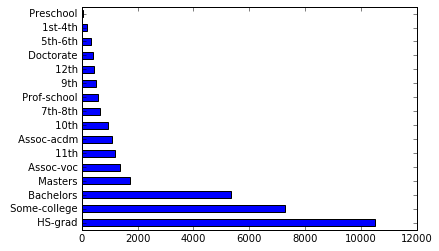

In [23]:
df.education.value_counts().plot('barh') # plot the value_counts

In [ ]:
df.hours_per_week.mean()

# Can also do:
df['hours_per_week'].mean()

## Comprehension Question:

What do you think we will get if we ask for the `type` of `df.hours_per_week` ?


In [24]:
df[['age', 'capital_gain', 'capital_loss', 'hours_per_week']].describe() # describe a subset

,age,capital_gain,capital_loss,hours_per_week
count,32561.000,32561.000,32561.000,32561.000
mean,38.582,1077.649,87.304,40.437
std,13.640,7385.292,402.960,12.347
min,17.000,0.000,0.000,1.000
25%,28.000,0.000,0.000,40.000
50%,37.000,0.000,0.000,40.000
75%,48.000,0.000,0.000,45.000
max,90.000,99999.000,4356.000,99.000


### Unique

Returns the unique values for the column

In [ ]:
# there's a space before each string in this data
# (common problem with csv files or web-scraped files)
df.education.unique()

In [ ]:
# looks like it's in every object column
df.workclass.unique()

In [25]:
df["education"] = df.education.str.strip() # strip the leading spaces

In [ ]:
# Hurray We removed the leading space
df.education.unique()

In [ ]:
df.info()

In [ ]:
df.education_num.value_counts()

In [ ]:
df.gender.unique()

In [ ]:
# Remove leading space in values
df["gender"] = df.gender.str.strip()

In [ ]:
# or use .replace()
df.replace?

In [ ]:
df.gender.unique()

## Selecting rows and columns 

### .loc 

* Selects row and columns by Names
* **by label**             `.loc[]`

### .iloc

* Selects row and columns by Index Position
* **by integer position**  `.iloc[]`


### .ix

* Redirects to `loc` or `iloc` based on input
* **for both**             `.ix[]`

http://pandas.pydata.org/pandas-docs/stable/indexing.html

In [ ]:
# select a row
df.iloc[3] #iloc[] will remember the indices even if rows are shuffled

In [ ]:
df.iloc[0:3]

## Note: I got 3 rows returned, similar to the indexing that applies to Python lists

In [ ]:
# select a range of rows
df.iloc[10:15]

In [ ]:
# last 2 rows
df.iloc[-2:] # from last 2 to end

In [ ]:
# selecting every other row in columns 3-5
df.iloc[::2, 2:5].head() # every other row, cols 2 to 4

In [ ]:
# select a row
df.loc[0:3]

## Question:
Why did I get 4 rows above here instead of 3?





Integers vs. labels!

In [ ]:
(df.loc[0:2, 'age'])

In [ ]:
df.ix[0:2, 2:6] # also, ix[] includes ending index

## Recall:
`df.ix` is primarily label-based, but "falls back" to integer-based (if the columns or index are not numerical).

## Filtering

In [ ]:
(df.age > 50) # boolean Series (boolean mask)

In [ ]:
asd = df[df.age > 50].head(5)
asd

In [26]:
# note that sometimes there are leading spaces not visible when printing out the df
df.loc[df.occupation == ' Tech-support', ['age', 'education', 'occupation', 'gender', 'income']]

,age,education,occupation,gender,income
24,59,HS-grad,Tech-support,Female,<=50K
25,56,Bachelors,Tech-support,Male,>50K
42,24,Bachelors,Tech-support,Male,<=50K
55,43,Some-college,Tech-support,Male,>50K
64,29,Some-college,Tech-support,Male,<=50K
103,20,Some-college,Tech-support,Female,<=50K
134,46,Assoc-acdm,Tech-support,Female,<=50K
144,70,Some-college,Tech-support,Male,<=50K
193,47,Some-college,Tech-support,Male,<=50K
194,41,Bachelors,Tech-support,Male,<=50K


In [27]:
# Filter for only certain Columns
df.loc[df.age > 50, ['age', 'education', 'occupation', 'gender', 'income']]

# What happens if I try to do the same with df.iloc instead of df.loc?
# What about df.ix?
# - will fail since iloc only takes integer locations

,age,education,occupation,gender,income
3,53,11th,Handlers-cleaners,Male,<=50K
7,52,HS-grad,Exec-managerial,Male,>50K
21,54,HS-grad,Other-service,Female,<=50K
24,59,HS-grad,Tech-support,Female,<=50K
25,56,Bachelors,Tech-support,Male,>50K
27,54,Some-college,?,Male,>50K
41,53,Bachelors,Prof-specialty,Male,<=50K
45,57,Bachelors,Prof-specialty,Male,>50K
46,53,HS-grad,Machine-op-inspct,Male,<=50K
67,53,HS-grad,Adm-clerical,Female,>50K


In [ ]:
df[df.age > 50].head(4)

## Now Filter on Gender

In [ ]:
df.gender=='Male'

In [ ]:
df.query?

In [ ]:
df.loc[df.gender=='Male',] # no cols specified

## Now Filter on Gender and Age between 30 and 40

In [ ]:
(df.gender == 'Male') & (df.age>=30) & (df.age<=40)
# boolean Series

In [ ]:
(df.age>=30)&(df.gender=='Male')

df.loc[(df.age>=30)&(df.gender=='Male')&(df.age<=40),:]

## Find Nulls

In [ ]:
# as we saw with df.info() there are no nulls... 
# but if there were this would find the rows where age is null
df[df.age.isnull()]

## Fill nulls

In [ ]:
# construct a df of null items
null_df = pd.DataFrame([1,2,4,np.nan], columns = ['column1'])

In [ ]:
null_df

In [ ]:
# you can also fill nulls with a value or string
null_df.column1.fillna(1000) # fill null with something like mean or median

In [ ]:
# fillna does not do it inplace unless you specify
null_df

In [ ]:
# you can also fill null with the median or mean value of the column
null_df.fillna(null_df.column1.median(), inplace=True)
null_df

In [ ]:
null_df.fillna('random_string')

## Drop nulls

In [ ]:
null_df = pd.DataFrame([1,2,4,np.nan], columns = ['column1'])
null_df

In [ ]:
null_df.dropna(how = 'any')

In [ ]:
# .isnull() and .notnull() does opposite things
null_df.isnull()

In [ ]:
null_df.notnull()

## Groupby

In [ ]:
df.groupby('relationship').count()
# extre 'relationship' row is just the grouping indicator

In [ ]:
df.groupby('relationship').mean()

In [ ]:
# How to groupby column and apply a function like sum, count, or mean
df.groupby(['education']).mean()

In [28]:
# groupby education and week, then look at mean hours per week and capital gain
df.groupby(['education','age',])[['hours_per_week','capital_gain']].mean()

hours_per_week  capital_gain
education    age                              
10th         17           21.543       266.659
             18           27.895         0.000
             19           34.500         0.000
             20           39.400         0.000
             21           39.000       229.882
             22           37.053         0.000
             23           42.588         0.000
             24           41.889         0.000
             25           38.714       123.667
             26           42.706       171.000
             27           46.059         0.000
             28           39.914         0.000
...                          ...           ...
Some-college 74           19.727      1822.818
             75           23.750         0.000
             76           23.714         0.000
             77           22.143         0.000
             78            3.000         0.000
             79           20.000         0.000
             80           40.000         0.000
             81           13.000         0.000
             82           11.500         0.000
             84           35.000         0.000
             88           40.000         0.000
             90           32.833         0.000

[965 rows x 2 columns]

In [29]:
# reset index (this turn the aggregration into a DataFrame) <- this flattens the data
df.groupby(['education','age',])[['hours_per_week','capital_gain']].mean().reset_index()

,education,age,hours_per_week,capital_gain
0,10th,17,21.543,266.659
1,10th,18,27.895,0.000
2,10th,19,34.500,0.000
3,10th,20,39.400,0.000
4,10th,21,39.000,229.882
5,10th,22,37.053,0.000
6,10th,23,42.588,0.000
7,10th,24,41.889,0.000
8,10th,25,38.714,123.667
9,10th,26,42.706,171.000


In [30]:
# To groupby multiple columns with multiple functions attached
df.groupby(['income', 'native_country']).age.agg(['count', 'mean'])
# grouped in order of which column is listed first
# group by income, then by native country, then
# agg(regate) computes the count and mean

count    mean
income native_country                    
 <=50K  ?                     437  36.854
        Cambodia               12  35.667
        Canada                 82  41.012
        China                  55  41.800
        Columbia               57  39.228
        Cuba                   70  47.286
        Dominican-Republic     68  37.941
        Ecuador                24  34.833
        El-Salvador            97  32.649
        England                60  38.967
        France                 17  38.118
        Germany                93  36.817
...                           ...     ...
 >50K   Philippines            61  42.738
        Poland                 12  50.583
        Portugal                4  40.000
        Puerto-Rico            12  46.500
        Scotland                3  52.667
        South                  16  44.875
        Taiwan                 20  40.800
        Thailand                3  32.667
        Trinadad&Tobago         2  42.500
        United-States        7171  44.297
        Vietnam                 5  35.400
        Yugoslavia              6  40.167

[82 rows x 2 columns]

In [31]:
# combine groupby with boolean
df[df.native_country == ' United-States'].groupby(['education']).hours_per_week.mean()

education
10th            36.915
11th            33.682
12th            34.951
1st-4th         32.913
5th-6th         36.979
7th-8th         39.060
9th             38.035
Assoc-acdm      40.657
Assoc-voc       41.633
Bachelors       42.709
Doctorate       47.409
HS-grad         40.596
Masters         44.169
Preschool       28.118
Prof-school     47.484
Some-college    38.862
Name: hours_per_week, dtype: float64

## Sorting
* ### sort_index() to sort by index
* ### sort_values() to sort by values

In [ ]:
pd.__version__

In [32]:
# groupby income and country and then sort by their mean age within each data block
df_grouped = df.groupby(['income','native_country']).mean().sort_values('age', ascending = True)
df_grouped

# Note: In this example, the groupby, mean, and sort functions are stringed together in one line
# in the next example, we will show a different syntax so that you could write them on separate
# lines to make the code a little easier to read

age      fnlwgt  education_num  capital_gain  \
income native_country                                                         
 <=50K  Taiwan              29.323  181981.290         12.548        71.032   
 >50K   Dominican-Republic  30.500  220226.000          9.000     49999.500   
        Hong                31.500  294478.833         13.833         0.000   
 <=50K  Holand-Netherlands  32.000   27882.000         10.000         0.000   
        Guatemala           32.262  266016.016          5.951       116.148   
        El-Salvador         32.649  264114.124          6.340       190.773   
 >50K   Thailand            32.667  199784.000         12.667         0.000   
 <=50K  Honduras            32.750  272571.000          8.167         0.000   
        Mexico              32.902  289038.116          5.959       135.538   
 >50K   Peru                33.500  314562.500         11.500         0.000   
 <=50K  Nicaragua           33.594  287987.906          8.656       212.312   
        Laos                33.938  209838.188          8.500       180.312   
...                            ...         ...            ...           ...   
 >50K   Honduras            47.000   51835.000         15.000         0.000   
 <=50K  Hungary             47.000  182993.800         10.700       413.800   
        Cuba                47.286  243906.229          9.043       136.986   
 >50K   Ecuador             47.500  169428.750         10.500      2346.500   
        Haiti               48.000  206832.500          9.500         0.000   
        El-Salvador         50.111  149620.556         12.222      4708.111   
        Greece              50.250  121954.125         11.125      3741.250   
        Italy               50.360  185383.360         10.960      1253.040   
        Poland              50.583  179314.167         11.083      2743.083   
        Scotland            52.667  208306.667         10.667      1726.000   
        Columbia            53.500  283410.500         15.500         0.000   
        Hungary             57.333  172137.333         11.000      1726.000   

                            capital_loss  hours_per_week  
income native_country                                     
 <=50K  Taiwan                    51.677          33.774  
 >50K   Dominican-Republic         0.000          47.000  
        Hong                     329.500          45.000  
 <=50K  Holand-Netherlands      2205.000          40.000  
        Guatemala                 26.131          39.361  
        El-Salvador               34.000          36.031  
 >50K   Thailand                   0.000          58.333  
 <=50K  Honduras                   0.000          34.333  
        Mexico                    22.990          40.003  
 >50K   Peru                     924.000          40.000  
 <=50K  Nicaragua                 49.344          36.094  
        Laos                       0.000          40.375  
...                                  ...             ...  
 >50K   Honduras                1902.000          60.000  
 <=50K  Hungary                  166.800          31.300  
        Cuba                      19.714          37.986  
 >50K   Ecuador                    0.000          48.750  
        Haiti                      0.000          42.750  
        El-Salvador                0.000          45.000  
        Greece                   539.625          50.625  
        Italy                     79.080          45.400  
        Poland                     0.000          39.000  
        Scotland                   0.000          46.667  
        Columbia                   0.000          50.000  
        Hungary                    0.000          50.000  

[82 rows x 6 columns]

In [33]:
# We want to group people by their income and country
# Then sort them by their income ASCE, and then sort by average age within that group DESC 
(df
 .groupby(['income','native_country'])
 .mean()
 .reset_index()
 .sort_values(['income','age'], ascending=[True,False])
)

# Note: In this example, we sort by the SAME column which we grouped by earlier 
# (eg. we first groupby 'income' and then sort by 'income')
# In this case, we must use .reset_index() to re-index the groupby objects, because the 'income' 
# column no longer exists after the groupby and hence cannot be sorted directly

,income,native_country,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
5,<=50K,Cuba,47.286,243906.229,9.043,136.986,19.714,37.986
18,<=50K,Hungary,47.000,182993.800,10.700,413.800,166.800,31.300
12,<=50K,Greece,44.667,151661.286,9.190,347.762,202.429,41.810
22,<=50K,Italy,44.375,179759.375,7.750,277.375,0.000,39.625
3,<=50K,China,41.800,175689.182,10.309,103.891,94.418,37.382
31,<=50K,Poland,41.250,185051.479,9.854,169.583,42.729,38.167
38,<=50K,Trinadad&Tobago,41.176,218778.941,8.412,0.000,137.588,37.059
2,<=50K,Canada,41.012,169279.585,10.244,110.695,145.524,37.915
32,<=50K,Portugal,40.333,153666.939,6.212,256.061,0.000,41.939
33,<=50K,Puerto-Rico,39.804,200316.010,8.108,83.980,43.078,38.471
